In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
LETTERGRADES = {
    'A+': 4.0,
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3.0,
    'B-': 2.7,
    'C+': 2.3,
    'C': 2.0,
    'C-': 1.7,
    'D+': 1.3,
    'D': 1.0,
    'E': 0,
    'F': 0
}

def get_number_grade(letter_grade: str) -> float:
    return LETTERGRADES[letter_grade]

In [3]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['mse', 'mae'],
}
# 180 - 270 dk
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_1.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

base_estimator = RandomForestRegressor(random_state=33)
gs = GridSearchCV(base_estimator, param_grid, cv=5).fit(train_features, train_labels)
gs.best_params_

c:\Python39\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


KeyboardInterrupt: 

Wave: 1
Mean Absolute Error (MAE): 0.0003533852435687219
Mean Squared Error (MSE): 5.3127575728800844e-05
Root Mean Squared Error (RMSE): 0.007288866559952984
Mean Absolute Percentage Error (MAPE): 0.00011326006118468451
Explained Variance Score: 0.9997683998237016
Max Error: 0.4829999999999979
Mean Squared Log Error: 3.2886724897547585e-06
Median Absolute Error: 0.0
R^2: 0.9997683984417756
Mean Poisson Deviance: 1.7252857196751355e-05
Mean Gamma Deviance: 5.713493480440171e-06



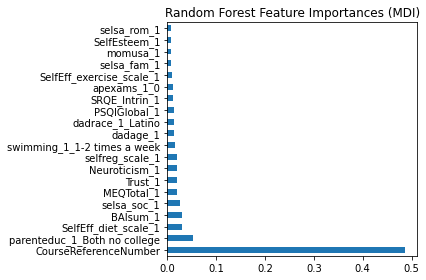

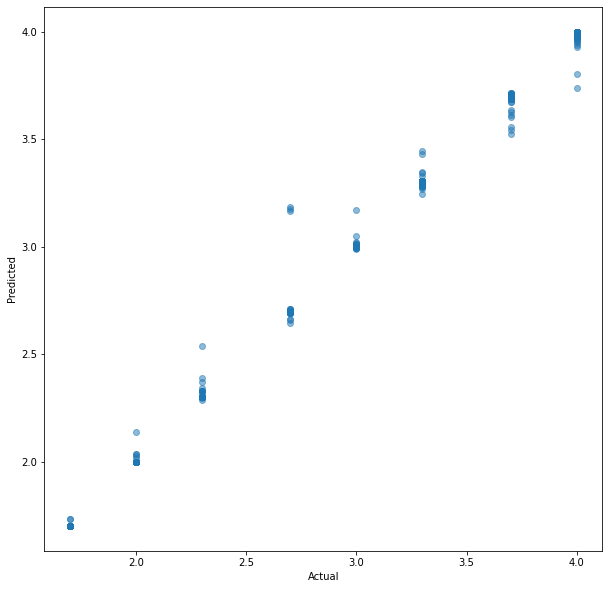

Wave: 2
Mean Absolute Error (MAE): 6.547242076240414e-05
Mean Squared Error (MSE): 9.462981392683758e-06
Root Mean Squared Error (RMSE): 0.0030761959288516977
Mean Absolute Percentage Error (MAPE): 1.9345822833724065e-05
Explained Variance Score: 0.9999608059707801
Max Error: 0.3979999999999997
Mean Squared Log Error: 4.709951320456162e-07
Median Absolute Error: 0.0
R^2: 0.9999608052045651
Mean Poisson Deviance: 2.71515773749505e-06
Mean Gamma Deviance: 7.893612737972986e-07



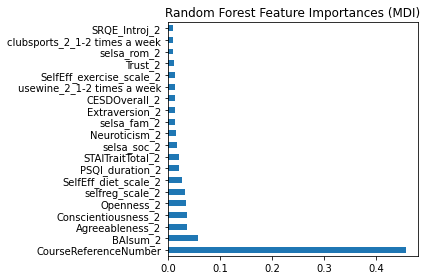

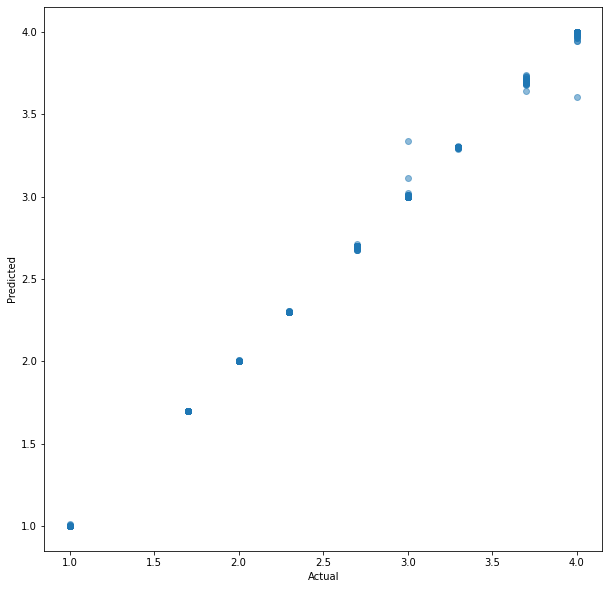

Wave: 3
Mean Absolute Error (MAE): 0.0011958266452671894
Mean Squared Error (MSE): 3.386035313000959e-05
Root Mean Squared Error (RMSE): 0.0058189649534955605
Mean Absolute Percentage Error (MAPE): 0.0003184217341527245
Explained Variance Score: 0.9996011884770355
Max Error: 0.05699999999999461
Mean Squared Log Error: 1.5072630109278723e-06
Median Absolute Error: 0.0
R^2: 0.9995997543801945
Mean Poisson Deviance: 9.039520460739393e-06
Mean Gamma Deviance: 2.414561691636206e-06



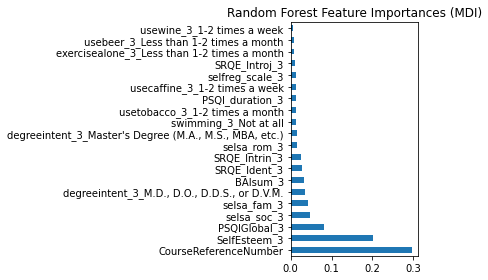

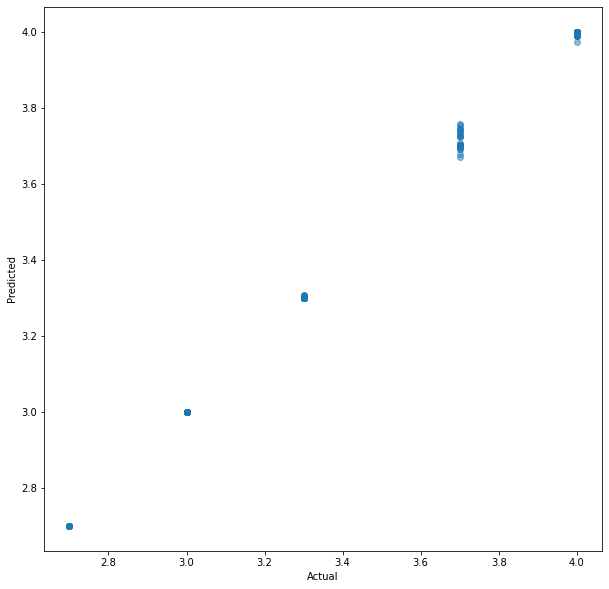

Wave: 4
Mean Absolute Error (MAE): 0.00038645023019773255
Mean Squared Error (MSE): 0.00011694725353230778
Root Mean Squared Error (RMSE): 0.010814215345197624
Mean Absolute Percentage Error (MAPE): 57376388330.92287
Explained Variance Score: 0.9996196209779686
Max Error: 1.0520000000000058
Mean Squared Log Error: 1.0300784459193407e-05
Median Absolute Error: 0.0
R^2: 0.9996195900459005



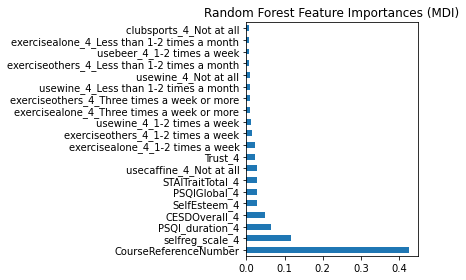

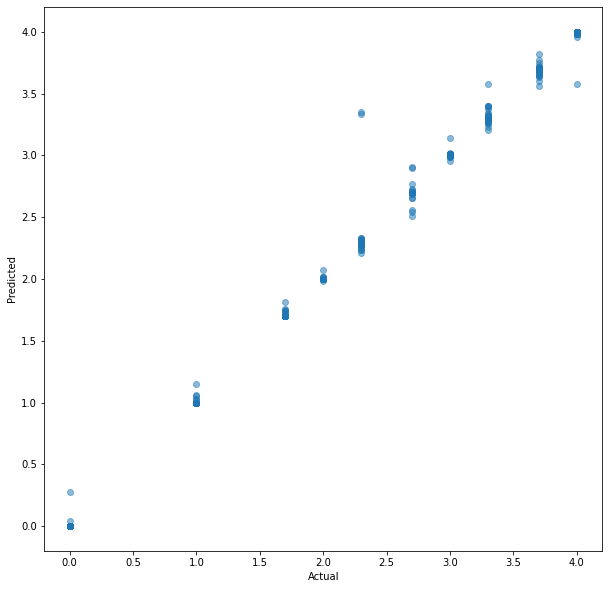

Wave: 5
Mean Absolute Error (MAE): 0.00039545391159044607
Mean Squared Error (MSE): 7.482858736577994e-05
Root Mean Squared Error (RMSE): 0.008650351863697796
Mean Absolute Percentage Error (MAPE): 0.000123121753788473
Explained Variance Score: 0.9997058438741077
Max Error: 0.7449999999999992
Mean Squared Log Error: 4.533716341004656e-06
Median Absolute Error: 0.0
R^2: 0.9997058310105468



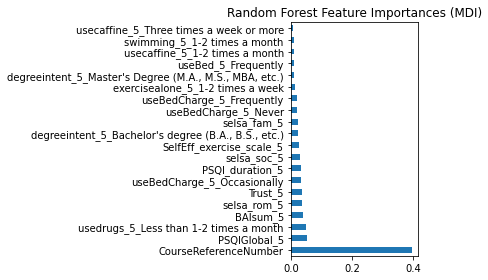

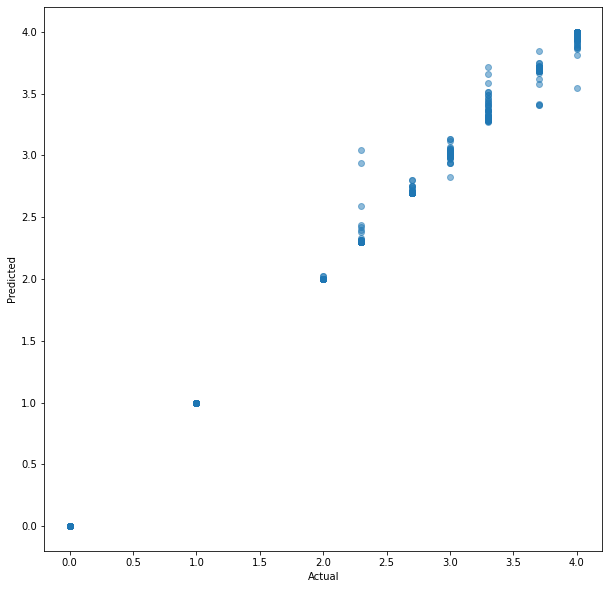

Wave: 6
Mean Absolute Error (MAE): 0.0003531730951948472
Mean Squared Error (MSE): 1.529512635379154e-05
Root Mean Squared Error (RMSE): 0.003910898407500704
Mean Absolute Percentage Error (MAPE): 0.00011311526726131725
Explained Variance Score: 0.9999394303417347
Max Error: 0.2869999999999979
Mean Squared Log Error: 1.2875803954082054e-06
Median Absolute Error: 0.0
R^2: 0.9999394180027471



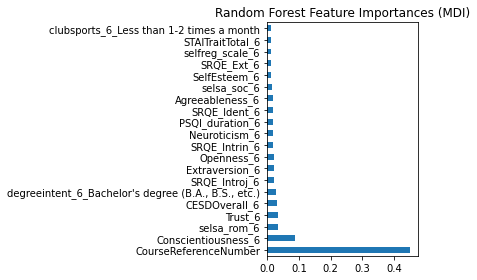

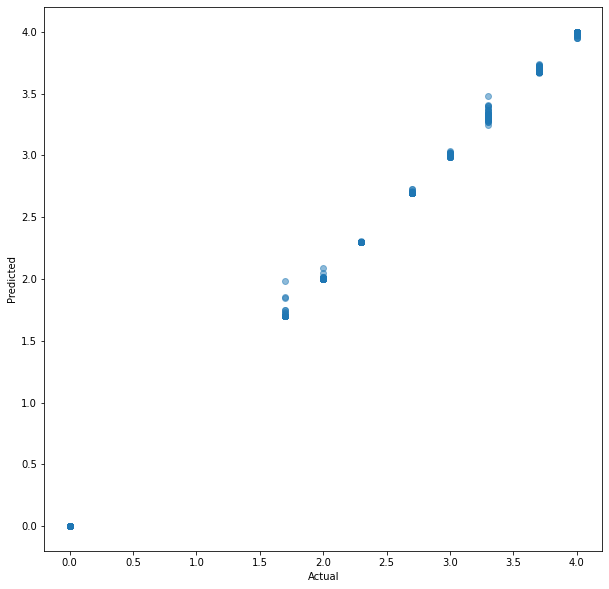

Wave: 7
Mean Absolute Error (MAE): 0.0011513480203377644
Mean Squared Error (MSE): 0.00018251224772762334
Root Mean Squared Error (RMSE): 0.013509709387237882
Mean Absolute Percentage Error (MAPE): 0.0003237250894906257
Explained Variance Score: 0.9992228367885662
Max Error: 1.2239999999999998
Mean Squared Log Error: 8.979909849312963e-06
Median Absolute Error: 0.0
R^2: 0.9992228361641955



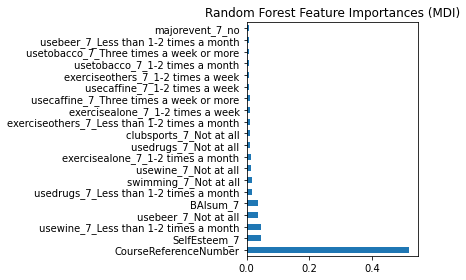

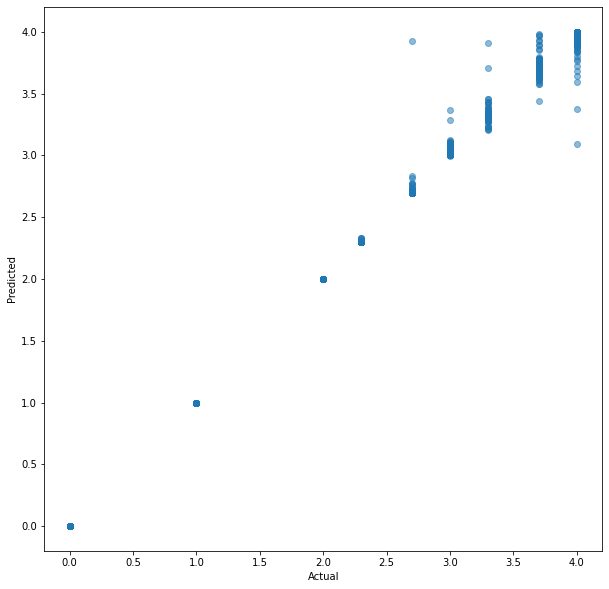

Wave: 8
Mean Absolute Error (MAE): 0.0005637396321691097
Mean Squared Error (MSE): 6.870582401730892e-05
Root Mean Squared Error (RMSE): 0.00828889763583246
Mean Absolute Percentage Error (MAPE): 0.00017787700821762114
Explained Variance Score: 0.9995423373878811
Max Error: 0.5240000000000009
Mean Squared Log Error: 5.543725299357444e-06
Median Absolute Error: 0.0
R^2: 0.9995423186042057
Mean Poisson Deviance: 2.6352471941149874e-05
Mean Gamma Deviance: 1.0817817059536955e-05



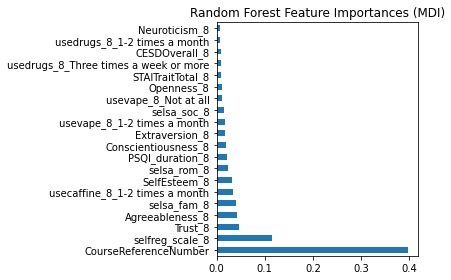

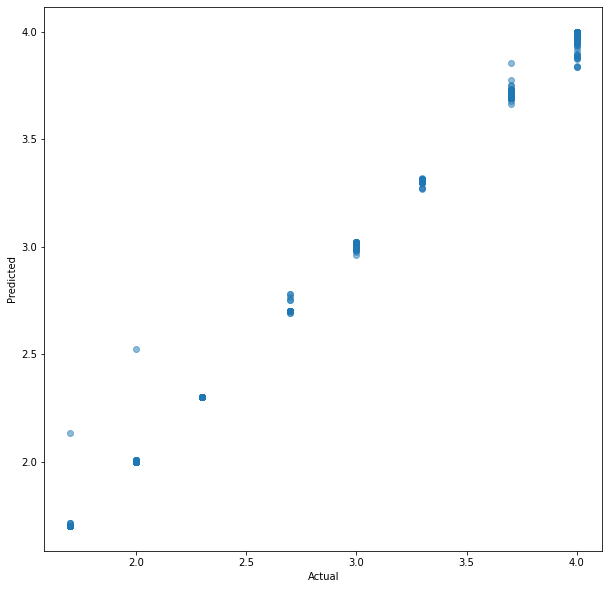

In [8]:
# missing 201500 201700 201800 201810
#               201510       201520       201600       201610      201620      201710      201720      201820
# academic_periods = [201510, 201520, 201600, 201610, 201620, 201710, 201720, 201820]

feature_imps = []

for wave in range(1, 9):
    data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
    data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
    train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))
    
    train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

    rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
    rf.fit(train_features, train_labels)
    predictions = rf.predict(test_features)

    print("Wave:", wave)
    feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
    feature_imps.append(feature_imp)

    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
    print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
    print('Max Error:', metrics.max_error(test_labels, predictions))
    print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
    print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
    print('R^2:', metrics.r2_score(test_labels, predictions))
    try:
        print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
    except:
        pass
    try:
        print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
    except:
        pass

    ax = feature_imp[:20].plot.barh()
    ax.set_title("Random Forest Feature Importances (MDI)")
    ax.figure.tight_layout()

    print()
    
    plt.figure(figsize=(10,10))
    plt.scatter(test_labels, predictions, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [9]:
data1 = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{1}.csv')
data1 = data1.loc[data1['FinalGrade'].isin(LETTERGRADES.keys())]

In [27]:
data1 = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{1}.csv')
data1 = data1.loc[data1['FinalGrade'].isin(LETTERGRADES.keys())]
train_data1 = pd.get_dummies(data1.drop(['egoid', 'FinalGrade', 'CourseReferenceNumber'], axis=1))

train_features1, test_features1, train_labels1, test_labels1 = train_test_split(train_data1, data1['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf1 = RandomForestRegressor(n_estimators=200, random_state=33, oob_score=True)
rf1.fit(train_features1, train_labels1)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=33)

In [34]:
rf1.oob_score_

-0.06335723031073126

In [36]:
pred_1 = rf1.predict(test_features1)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels1, pred_1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels1, pred_1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels1, pred_1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels1, pred_1))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels1, pred_1))
print('Max Error:', metrics.max_error(test_labels1, pred_1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels1, pred_1))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels1, pred_1))
print('R^2:', metrics.r2_score(test_labels1, pred_1))

Mean Absolute Error (MAE): 0.36036873109234424
Mean Squared Error (MSE): 0.24393220220134373
Root Mean Squared Error (RMSE): 0.49389493032561466
Mean Absolute Percentage Error (MAPE): 0.11142244404438532
Explained Variance Score: -0.06337050372239128
Max Error: 2.013669047619053
Mean Squared Log Error: 0.013707826787202644
Median Absolute Error: 0.2584012355699876
R^2: -0.06338520732335273


<AxesSubplot:ylabel='Density'>

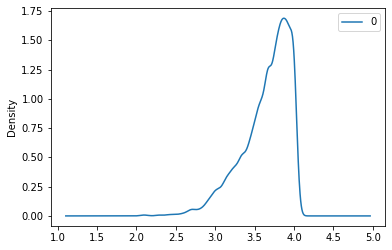

In [51]:
pd.DataFrame(pred_1).plot(kind='density')

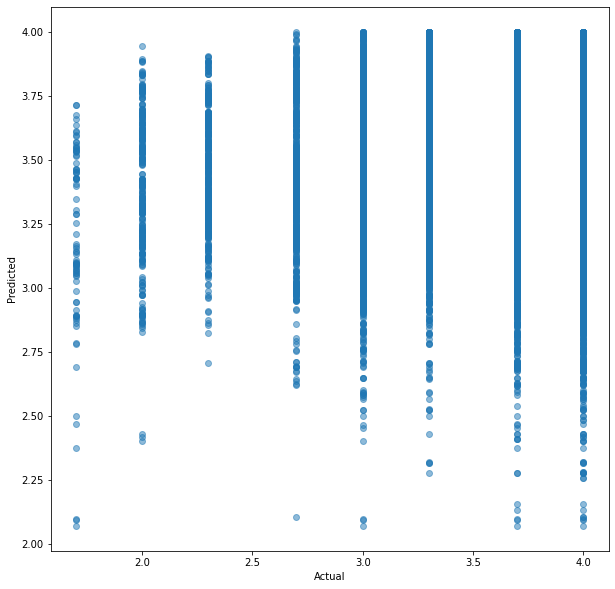

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(test_labels1, pred_1, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [17]:
feature_imp_1 = pd.Series(rf1.feature_importances_, index = train_data1.columns).sort_values(ascending = False)
feature_imp_1

parenteduc_1_Both no college    8.431302e-02
SelfEff_diet_scale_1            4.616383e-02
BAIsum_1                        4.507703e-02
selfreg_scale_1                 3.552226e-02
selsa_soc_1                     3.410645e-02
                                    ...     
hssex_1_Not applicable          6.101567e-07
MEQGroup_1_definite morning     1.320211e-08
daddec_1                        0.000000e+00
momdec_1                        0.000000e+00
AcademicPeriod                  0.000000e+00
Length: 204, dtype: float64

In [21]:
value_counter = 0
counter = 0
for feature, value in feature_imp_1.items():
    value_counter+= value
    counter += 1
    if value_counter >= 0.8:
        print(feature, counter)
        break

hsgrade_1_A or A+ 35


In [41]:
data1_w = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{1}.csv')
data1_w = data1_w.loc[data1_w['FinalGrade'].isin(LETTERGRADES.keys())]
train_data1_w = pd.get_dummies(data1_w['CourseReferenceNumber'])

train_features1_w, test_features1_w, train_labels1_w, test_labels1_w = train_test_split(train_data1_w, data1_w['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf1_w = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf1_w.fit(train_features1_w, train_labels1_w)

RandomForestRegressor(oob_score=True, random_state=33)

In [42]:
rf1_w.oob_score_

0.49701025420139744

In [48]:
pred_1_w = rf1_w.predict(test_features1_w)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels1_w, pred_1_w))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels1_w, pred_1_w))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels1_w, pred_1_w, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels1, pred_1_w))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels1_w, pred_1_w))
print('Max Error:', metrics.max_error(test_labels1_w, pred_1_w))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels1_w, pred_1_w))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels1_w, pred_1_w))
print('R^2:', metrics.r2_score(test_labels1_w, pred_1_w))

Mean Absolute Error (MAE): 0.20027553876210674
Mean Squared Error (MSE): 0.11566786063604435
Root Mean Squared Error (RMSE): 0.34009978041163796
Mean Absolute Percentage Error (MAPE): 0.06417090438808803
Explained Variance Score: 0.4957859254193173
Max Error: 1.602965317451811
Mean Squared Log Error: 0.006941860534170508
Median Absolute Error: 0.11006235941148379
R^2: 0.49576361442601224


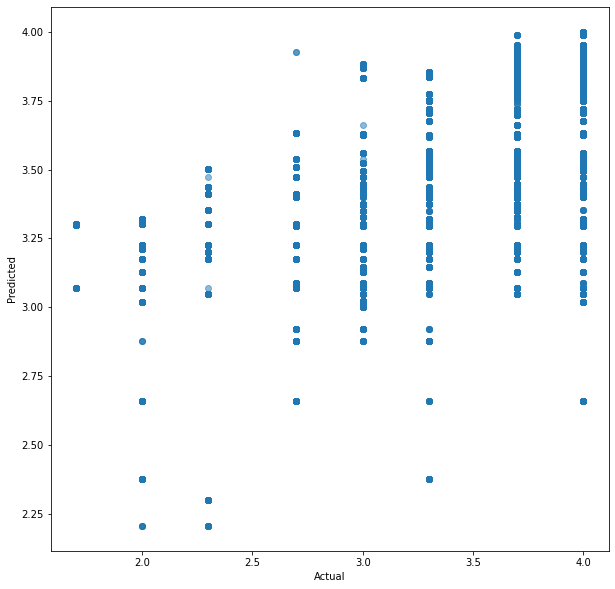

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(test_labels1_w, pred_1_w, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [19]:
feature_imp_1_w = pd.Series(rf1_w.feature_importances_, index = train_data1_w.columns).sort_values(ascending = False)
feature_imp_1_w

CourseReferenceNumber                           4.867541e-01
parenteduc_1_Both no college                    5.276377e-02
SelfEff_diet_scale_1                            3.062976e-02
BAIsum_1                                        2.990025e-02
selsa_soc_1                                     2.564995e-02
                                                    ...     
hsgrade_1_B+                                    1.877899e-19
usedrugs_prescr_1_Three times a week or more    7.310616e-21
momdec_1                                        0.000000e+00
AcademicPeriod                                  0.000000e+00
daddec_1                                        0.000000e+00
Length: 205, dtype: float64

In [22]:
value_counter = 0
counter = 0
for feature, value in feature_imp_1_w.items():
    value_counter+= value
    counter += 1
    if value_counter >= 0.8:
        print(feature, counter)
        break

momusa_1 18


Wave: 1
Feature importances: CourseReferenceNumber                           4.867541e-01
parenteduc_1_Both no college                    5.276377e-02
SelfEff_diet_scale_1                            3.062976e-02
BAIsum_1                                        2.990025e-02
selsa_soc_1                                     2.564995e-02
                                                    ...     
hsgrade_1_B+                                    1.877899e-19
usedrugs_prescr_1_Three times a week or more    7.310616e-21
momdec_1                                        0.000000e+00
AcademicPeriod                                  0.000000e+00
daddec_1                                        0.000000e+00
Length: 205, dtype: float64
Mean Absolute Error (MAE): 0.0003533852435687219
Mean Squared Error (MSE): 5.3127575728800844e-05
Root Mean Squared Error (RMSE): 0.007288866559952984
Mean Absolute Percentage Error (MAPE): 0.00011326006118468451
Explained Variance Score: 0.9997683998237016
Max Error: 0.4

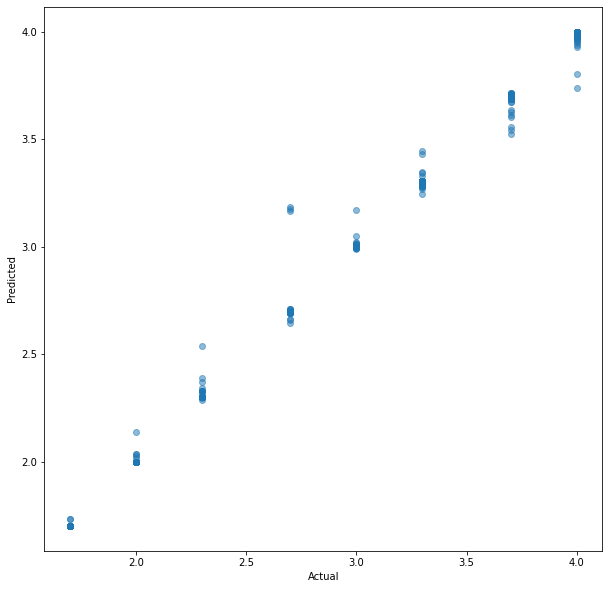

In [6]:
wave = 1
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('OOB Score:', rf.oob_score_)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 2
Feature importances: CourseReferenceNumber    4.572987e-01
BAIsum_2                 5.783862e-02
Agreeableness_2          3.705684e-02
Conscientiousness_2      3.559368e-02
Openness_2               3.540123e-02
                             ...     
dataDate_spring_break    7.727735e-16
dataDate_summer_break    7.685026e-16
dataDate_spring_final    7.640383e-16
dataDate_winter_break    5.074431e-16
AcademicPeriod           0.000000e+00
Length: 141, dtype: float64
Mean Absolute Error (MAE): 6.547242076240414e-05
Mean Squared Error (MSE): 9.462981392683758e-06
Root Mean Squared Error (RMSE): 0.0030761959288516977
Mean Absolute Percentage Error (MAPE): 1.9345822833724065e-05
Explained Variance Score: 0.9999608059707801
Max Error: 0.3979999999999997
Mean Squared Log Error: 4.709951320456162e-07
Median Absolute Error: 0.0
R^2: 0.9999608052045651
Mean Poisson Deviance: 2.71515773749505e-06
Mean Gamma Deviance: 7.893612737972986e-07


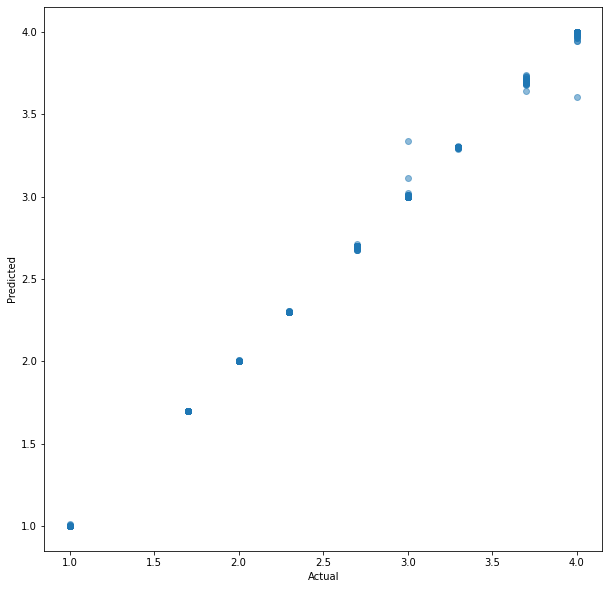

In [7]:
wave = 2
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 3
Feature importances: CourseReferenceNumber                   2.960078e-01
SelfEsteem_3                            2.021425e-01
PSQIGlobal_3                            8.089775e-02
selsa_soc_3                             4.635029e-02
selsa_fam_3                             4.255005e-02
                                            ...     
exerciseothers_3_1-2 times a month      1.102150e-16
usedrugs_3_1-2 times a week             0.000000e+00
usewine_3_Three times a week or more    0.000000e+00
BAIgroup_3_low                          0.000000e+00
AcademicPeriod                          0.000000e+00
Length: 96, dtype: float64
Mean Absolute Error (MAE): 0.0011958266452671894
Mean Squared Error (MSE): 3.386035313000959e-05
Root Mean Squared Error (RMSE): 0.0058189649534955605
Mean Absolute Percentage Error (MAPE): 0.0003184217341527245
Explained Variance Score: 0.9996011884770355
Max Error: 0.05699999999999461
Mean Squared Log Error: 1.5072630109278723e-06
Median Absolute Error: 0.0

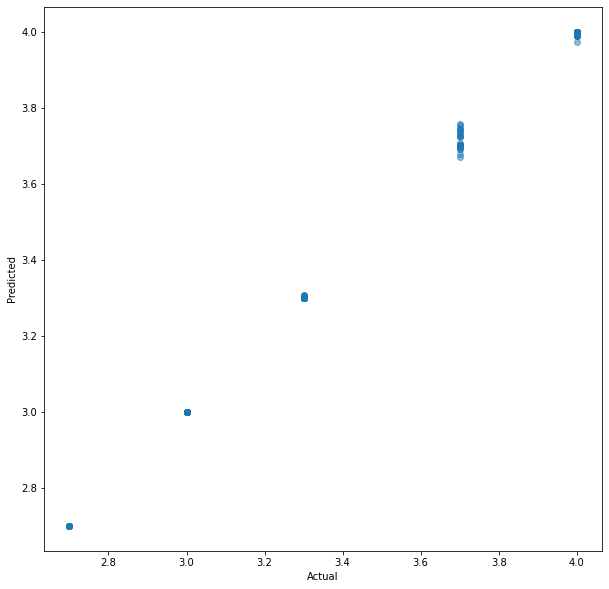

In [8]:
wave = 3
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 4
Feature importances: CourseReferenceNumber    4.271289e-01
selfreg_scale_4          1.162278e-01
PSQI_duration_4          6.531371e-02
CESDOverall_4            4.747845e-02
SelfEsteem_4             2.824554e-02
                             ...     
peakmins                 1.230485e-07
dataDate_fall_break      3.232215e-09
dataDate_fall_final      7.259524e-16
dataDate_winter_break    5.344002e-16
AcademicPeriod           0.000000e+00
Length: 95, dtype: float64
Mean Absolute Error (MAE): 0.00038645023019773255
Mean Squared Error (MSE): 0.00011694725353230778
Root Mean Squared Error (RMSE): 0.010814215345197624
Mean Absolute Percentage Error (MAPE): 57376388330.92287
Explained Variance Score: 0.9996196209779686
Max Error: 1.0520000000000058
Mean Squared Log Error: 1.0300784459193407e-05
Median Absolute Error: 0.0
R^2: 0.9996195900459005


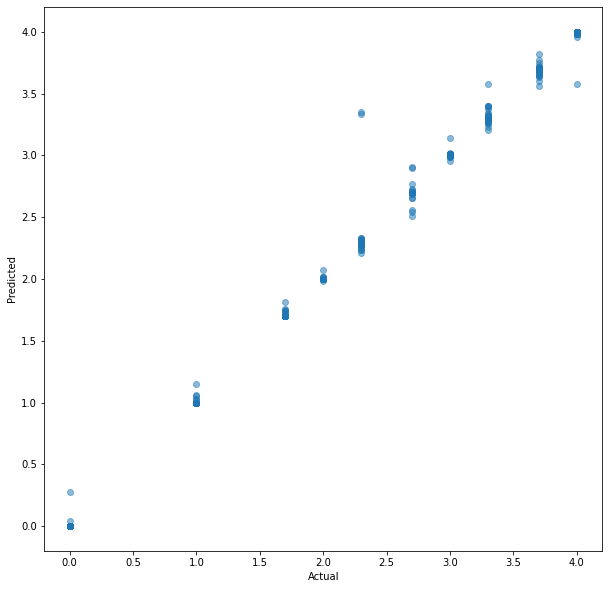

In [9]:
wave = 4
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 5
Feature importances: CourseReferenceNumber                     3.941046e-01
PSQIGlobal_5                              5.204335e-02
usedrugs_5_Less than 1-2 times a month    4.942165e-02
BAIsum_5                                  3.986262e-02
selsa_rom_5                               3.545323e-02
                                              ...     
dataDate_winter_break                     2.173679e-06
usedrugs_prescr_5_1-2 times a month       1.809591e-06
dataDate_summer_break                     9.729238e-07
dataDate_spring_final                     1.005092e-15
AcademicPeriod                            0.000000e+00
Length: 110, dtype: float64
Mean Absolute Error (MAE): 0.00039545391159044607
Mean Squared Error (MSE): 7.482858736577994e-05
Root Mean Squared Error (RMSE): 0.008650351863697796
Mean Absolute Percentage Error (MAPE): 0.000123121753788473
Explained Variance Score: 0.9997058438741077
Max Error: 0.7449999999999992
Mean Squared Log Error: 4.533716341004656e-06
Median

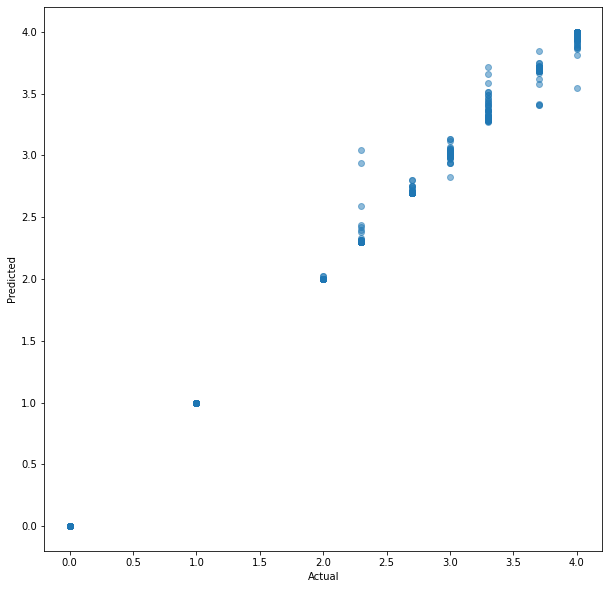

In [10]:
wave = 5
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 6
Feature importances: CourseReferenceNumber    4.512990e-01
Conscientiousness_6      8.911870e-02
selsa_rom_6              3.485345e-02
Trust_6                  3.349492e-02
CESDOverall_6            3.139082e-02
                             ...     
dataDate_winter_break    1.697397e-07
dataDate_fall_final      5.352560e-08
dataDate_fall_class      2.417649e-08
dataDate_fall_break      2.244981e-08
AcademicPeriod           0.000000e+00
Length: 113, dtype: float64
Mean Absolute Error (MAE): 0.0003531730951948472
Mean Squared Error (MSE): 1.529512635379154e-05
Root Mean Squared Error (RMSE): 0.003910898407500704
Mean Absolute Percentage Error (MAPE): 0.00011311526726131725
Explained Variance Score: 0.9999394303417347
Max Error: 0.2869999999999979
Mean Squared Log Error: 1.2875803954082054e-06
Median Absolute Error: 0.0
R^2: 0.9999394180027471


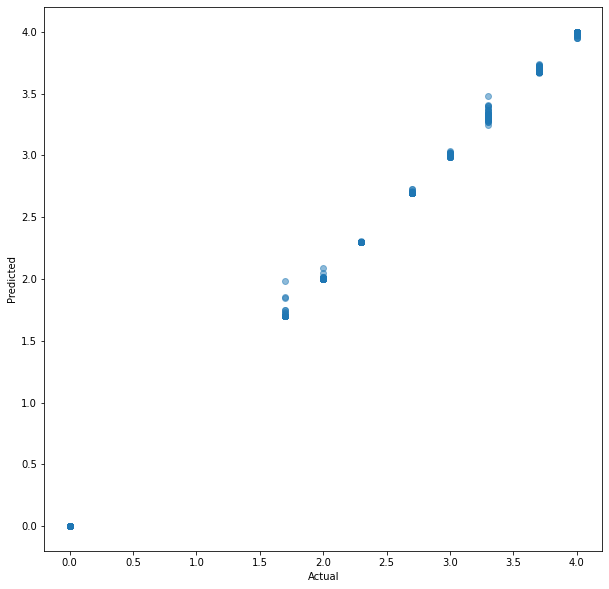

In [11]:
wave = 6
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 7
Feature importances: CourseReferenceNumber                    5.185168e-01
SelfEsteem_7                             4.700630e-02
usewine_7_Less than 1-2 times a month    4.475400e-02
usebeer_7_Not at all                     3.677878e-02
BAIsum_7                                 3.666898e-02
                                             ...     
minsafterwakeup                          8.958505e-06
dataDate_summer_break                    6.217332e-06
dataDate_spring_break                    3.765330e-06
dataDate_spring_final                    9.792235e-07
AcademicPeriod                           0.000000e+00
Length: 92, dtype: float64
Mean Absolute Error (MAE): 0.0011513480203377644
Mean Squared Error (MSE): 0.00018251224772762334
Root Mean Squared Error (RMSE): 0.013509709387237882
Mean Absolute Percentage Error (MAPE): 0.0003237250894906257
Explained Variance Score: 0.9992228367885662
Max Error: 1.2239999999999998
Mean Squared Log Error: 8.979909849312963e-06
Median Absolute E

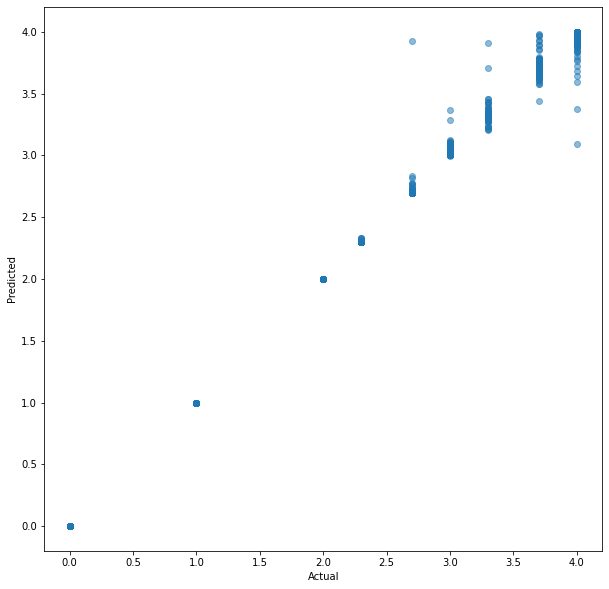

In [12]:
wave = 7
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Wave: 8
Feature importances: CourseReferenceNumber    3.974596e-01
selfreg_scale_8          1.153847e-01
Trust_8                  4.669259e-02
Agreeableness_8          4.306740e-02
selsa_fam_8              3.951361e-02
                             ...     
dataDate_summer_break    6.847357e-07
peakcal                  3.806883e-07
peakmins                 4.462038e-15
dataDate_spring_final    4.636114e-16
AcademicPeriod           0.000000e+00
Length: 114, dtype: float64
Mean Absolute Error (MAE): 0.0005637396321691097
Mean Squared Error (MSE): 6.870582401730892e-05
Root Mean Squared Error (RMSE): 0.00828889763583246
Mean Absolute Percentage Error (MAPE): 0.00017787700821762114
Explained Variance Score: 0.9995423373878811
Max Error: 0.5240000000000009
Mean Squared Log Error: 5.543725299357444e-06
Median Absolute Error: 0.0
R^2: 0.9995423186042057
Mean Poisson Deviance: 2.6352471941149874e-05
Mean Gamma Deviance: 1.0817817059536955e-05


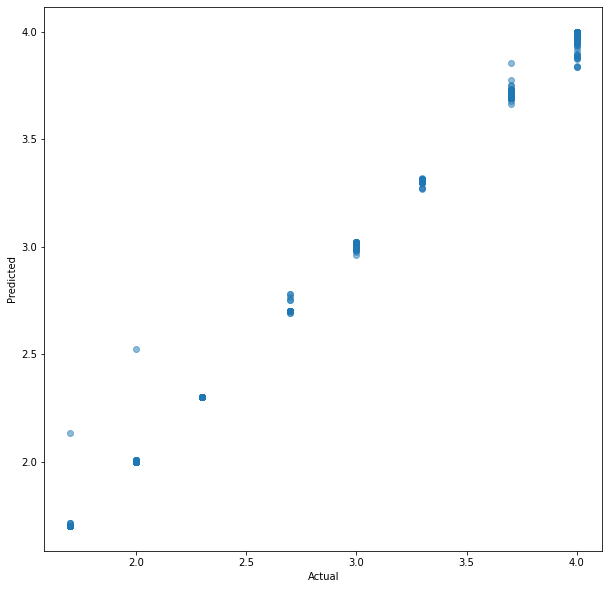

In [13]:
wave = 8
data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = False)
print("Feature importances:", feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [56]:
data1_w = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{1}.csv')
data1_w = data1_w.loc[data1_w['FinalGrade'].isin(LETTERGRADES.keys())]
data1_w['FinalGrade'] = data1_w['FinalGrade'].apply(get_number_grade)
q_low = data1_w["FinalGrade"].quantile(0.50)
q_hi  = data1_w["FinalGrade"].quantile(0.99)
print(q_low, q_hi)
train_data1_w = data1_w[(data1_w["FinalGrade"] <= q_hi) & (data1_w["FinalGrade"] >= q_low)]
train_data1_w = pd.get_dummies(data1_w['CourseReferenceNumber'])

train_features1_w, test_features1_w, train_labels1_w, test_labels1_w = train_test_split(train_data1_w, data1_w['FinalGrade'], test_size = 0.25, random_state = 42)

rf1_w = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf1_w.fit(train_features1_w, train_labels1_w)


3.7 4.0


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 367 features, but RandomForestRegressor is expecting 204 features as input.

In [61]:
train_data1_w.dtypes

10025    uint8
10026    uint8
10076    uint8
10083    uint8
10090    uint8
         ...  
21100    uint8
21101    uint8
21143    uint8
21144    uint8
21154    uint8
Length: 367, dtype: object

In [59]:
pred_1 = rf1_w.predict(test_features1_w)

Mean Absolute Error (MAE): 0.20027553876210674
Mean Squared Error (MSE): 0.11566786063604435
Root Mean Squared Error (RMSE): 0.34009978041163796
Mean Absolute Percentage Error (MAPE): 0.06417090438808803
Explained Variance Score: 0.4957859254193173
Max Error: 1.602965317451811
Mean Squared Log Error: 0.006941860534170508
Median Absolute Error: 0.11006235941148379
R^2: 0.49576361442601224
Mean Poisson Deviance: 0.03652571422903643
Mean Gamma Deviance: 0.01176811414198669


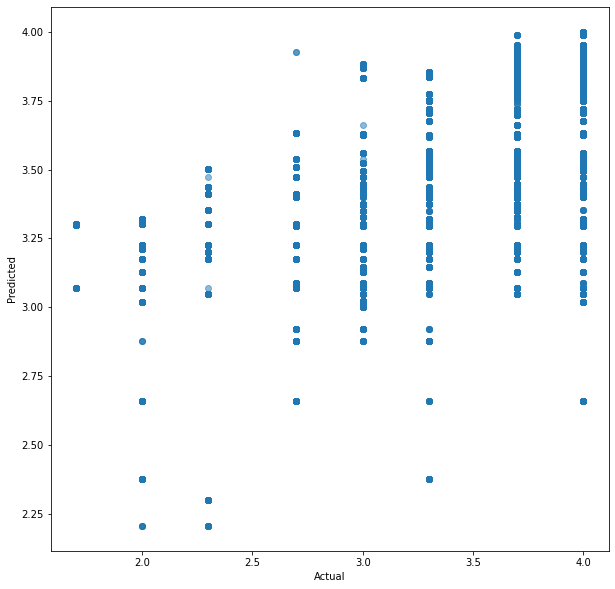

In [60]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels1_w, pred_1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels1_w, pred_1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels1_w, pred_1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels1_w, pred_1))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels1_w, pred_1))
print('Max Error:', metrics.max_error(test_labels1_w, pred_1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels1_w, pred_1))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels1_w, pred_1))
print('R^2:', metrics.r2_score(test_labels1_w, pred_1))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels1_w, pred_1))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels1_w, pred_1))
except:
    pass

plt.figure(figsize=(10,10))
plt.scatter(test_labels1_w, pred_1, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()